# Libraries and Dataset

In [16]:
import pandas as pd
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import random
#setting the plt size
plt.rcParams['figure.figsize'] = 9,8

prices_df = pd.read_csv('./stock_portfolio.csv',index_col='Date')

#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
    returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#print(data)
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)
#cleaned_data
prices_df.shape

(519, 483)

In [17]:
prices_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,235.639999,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.98,106.089996,10.88,...,77.320000,131.869995,46.693333,82.930000,98.589996,74.949997,111.800003,86.099998,195.690002,65.769997
2018-01-03,235.630005,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.55,107.050003,10.87,...,77.099998,134.289993,46.306667,82.260002,99.449997,75.510002,112.279999,87.349998,197.770004,65.540001
2018-01-04,238.710007,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,12.12,111.000000,10.83,...,74.800003,133.380005,46.493332,83.370003,99.540001,71.599998,112.230003,88.099998,199.660004,65.309998
2018-01-05,240.570007,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,11.88,112.180000,10.87,...,75.440002,131.899994,46.299999,81.830002,100.129997,72.919998,111.620003,87.989998,202.229996,64.870003
2018-01-08,239.789993,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,12.28,111.389999,10.87,...,74.580002,133.940002,46.066666,82.370003,101.610001,73.849998,110.019997,88.050003,204.759995,65.430000


# Optimal number of clusters

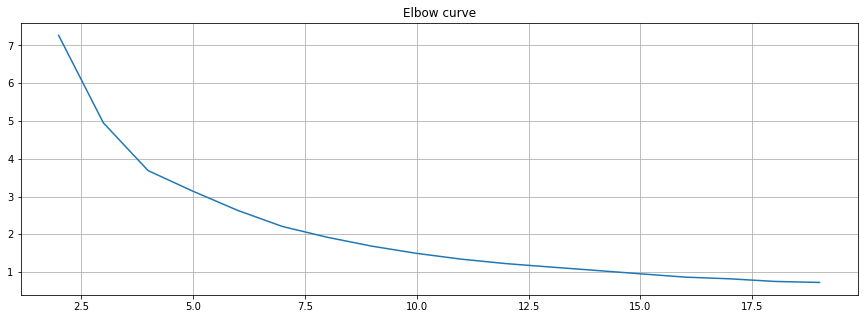

In [3]:
from sklearn.cluster import KMeans
X = cleaned_data
#within cluster sum of squares.we calculate the sum of squares of the distance of each data point in cluster k from their center point ki.
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

# Clustering

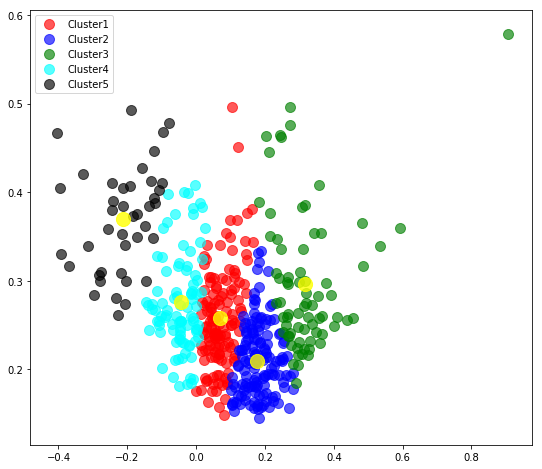

In [4]:
#the change in slope of curve is not significant after k=5. Hence we select no. of clusters to be 5

# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(cleaned_data,5)
# assign each sample to a cluster
idx,_ = vq(cleaned_data,centroids)
data = cleaned_data
#using scatter plt 
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
#plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()

# Classification of stocks

In [5]:
#Finally to get the details of which stock is actually in which cluster we can run the following line 
# of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
labels =['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)

yo = pd.DataFrame(df[df['Cluster']==0],columns=["Stock Symbol"])
yo.rename(columns = {"Stock Symbol": "Cluster 0"}, 
                                 inplace = True) 
yo.reset_index(inplace=True)
yo.drop(columns=['index'],inplace=True)

yo1 = pd.DataFrame(df[df['Cluster']==1],columns=["Stock Symbol"])
yo1.rename(columns = {"Stock Symbol": "Cluster 1"}, 
                                 inplace = True) 
yo1.reset_index(inplace=True)
yo1.drop(columns=['index'],inplace=True)

yo2 = pd.DataFrame(df[df['Cluster']==2],columns=["Stock Symbol"])
yo2.rename(columns = {"Stock Symbol": "Cluster 2"}, 
                                 inplace = True) 
yo2.reset_index(inplace=True)
yo2.drop(columns=['index'],inplace=True)

yo3 = pd.DataFrame(df[df['Cluster']==3],columns=["Stock Symbol"])
yo3.rename(columns = {"Stock Symbol": "Cluster 3"}, 
                                 inplace = True) 
yo3.reset_index(inplace=True)
yo3.drop(columns=['index'],inplace=True)

yo4 = pd.DataFrame(df[df['Cluster']==4],columns=["Stock Symbol"])
yo4.rename(columns = {"Stock Symbol": "Cluster 4"}, 
                                 inplace = True) 
yo4.reset_index(inplace=True)
yo4.drop(columns=['index'],inplace=True)

yoy = pd.concat([yo, yo1,yo2,yo3,yo4], axis=1, sort=False)
#writing the stocks and cluster they belong to a csv file which can be used to build diverse portfolio.
yoy.to_csv('stock_portfolio_done.csv', header= True)
yoy.head()

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,ABMD,ABT,ADBE,MMM,ALB
1,AGN,ACN,AMD,ABBV,ADS
2,ALL,AAP,AES,ATVI,AAL
3,AMP,AFL,ALGN,ALK,APA
4,APH,A,AMZN,ALXN,COG
